In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#importing the dataset
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


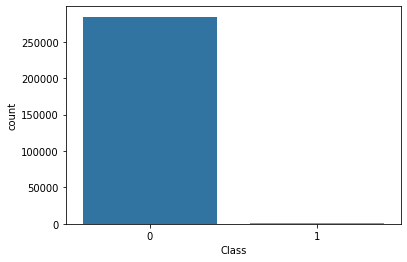

In [3]:
#lets plot the class and see how much it is unbalanced
sns.countplot('Class', data = dataset)

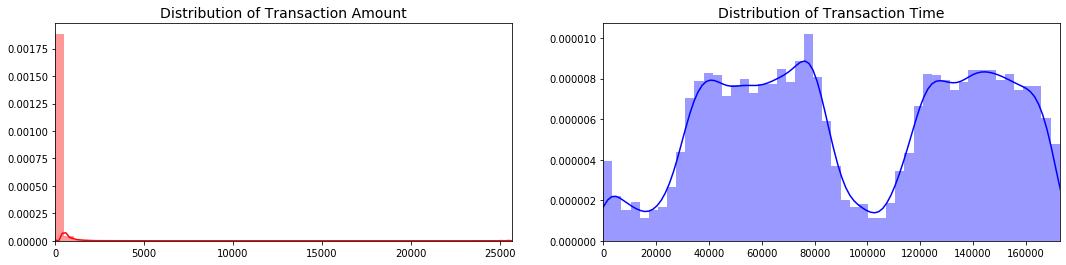

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dataset['Amount'].values
time_val = dataset['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()


In [5]:
#we are using robust scalar though it is less affected by the outliers 

from sklearn.preprocessing import RobustScaler

R_scalar = RobustScaler()
dataset['amount'] = R_scalar.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['time'] = R_scalar.fit_transform(dataset['Time'].values.reshape(-1,1))

In [6]:
#lets drop the unscaled data
dataset.drop(['Time','Amount'],axis=1,inplace = True)
amount = dataset['amount']
time = dataset['time']

dataset.drop(['amount','time'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', amount)
dataset.insert(1, 'scaled_time', time)

In [7]:
dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
#seperating the original dataset so that we can test it with original samples
X = dataset.drop(['Class'],axis=1)
y = dataset['Class'] 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5
                                  , metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
Y_pred= classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix,recall_score,roc_curve,roc_auc_score,precision_recall_curve


In [13]:
accuracy_score(y_test, Y_pred)


0.9994943962248252

In [14]:
f1_score(y_test, Y_pred, average='weighted')

0.9994774056029356

In [15]:
recall_score(y_test, Y_pred,average='weighted')

0.9994943962248252

In [16]:
print(confusion_matrix(y_test,Y_pred))

[[71080    11]
 [   25    86]]


In [17]:
auc = roc_auc_score(y_test,Y_pred)
print('AUC',auc)

AUC 0.8873100217574201


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.79      0.77      0.78       111

    accuracy                           1.00     71202
   macro avg       0.89      0.89      0.89     71202
weighted avg       1.00      1.00      1.00     71202



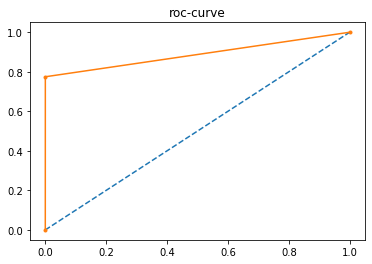

In [30]:
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, Y_pred)
pyplot.title("roc-curve")
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [19]:
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred)

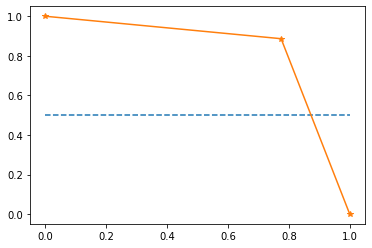

In [20]:
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='*')
# show the plot
pyplot.show()

In [21]:
#neural network implementation
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy,binary_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [22]:
undersample_model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])
undersample_model.fit(X_train, y_train,batch_size=32, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
213605/213605 [==============================] - 13s 61us/step - loss: 0.0110 - acc: 0.9966
Epoch 2/20
213605/213605 [==============================] - 8s 37us/step - loss: 0.0032 - acc: 0.9993
Epoch 3/20
213605/213605 [==============================] - 8s 37us/step - loss: 0.0028 - acc: 0.9994
Epoch 4/20
213605/213605 [==============================] - 7s 34us/step - loss: 0.0026 - acc: 0.9994
Epoch 5/20
213605/213605 [==============================] - 8s 37us/step - loss: 0.0025 - acc: 0.9994
Epoch 6/20
213605/213605 [==============================] - 7s 34us/step - loss: 0.0024 - acc: 0.9994
Epoch 7/20
213605/213605 [==============================] - 8s 36us/step - loss: 0.0023 - acc: 0.9994
Epoch 8/20
213605/213605 [==============================] - 8s 35us/step - loss: 0.0022 - acc: 0.9994
Epoch 9/20
213605/213605 [==============================] - 8s 37us/step - loss: 0.0022 - acc: 0.9995
Epoch 10/20
213605/213605 [======

In [23]:
y_pred = undersample_model.predict(X_test)
y_pred = (y_pred > 0.5)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[71068,    23],
       [   25,    86]], dtype=int64)

In [25]:
recall_score(y_test, y_pred,average='weighted')

0.9993258616331002

In [26]:
f1_score(y_test, y_pred, average='weighted')

0.9993228021091056

In [27]:
accuracy_score(y_test, y_pred)

0.9993258616331002

In [28]:
auc = roc_auc_score(y_test,y_pred)
print('AUC',auc)

AUC 0.887225622888365


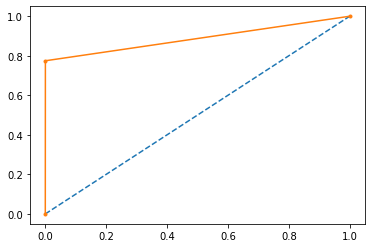

In [29]:
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [32]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.89      0.77      0.83       111

    accuracy                           1.00     71202
   macro avg       0.94      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202

